#TELCO Customer Churn
This problem was obtained from Kaggle (https://www.kaggle.com/datasets/blastchar/telco-customer-churn?resource=download)

TELCO company needs to identify when a client would churn the service to create a new campaign with the idea of retain the clients


#1. IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 8.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

import optuna
from sklearn.metrics import recall_score

from sklearn.svm import SVC
import random

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report, recall_score

from tensorflow.keras import layers, models
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# 2. IMPORT DATA

In [ ]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',na_values=['NaN', 'nan', 'None', 'NONE', 'NULL', 'null', ' ', ''],keep_default_na=True)

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


It´s important to understand what each column represents
* customerID: this variable is a code each client have to identify him
*  gender: this variable represents the client gender (male/female)
* SeniorCitizen: 1 if client is a senior citizen, 0 otherwise
* Partner: 1 Yes if client has a partner, No otherwise
* Dependents: 1 Yes if client has dependents, No otherwise
* tenure:number of months the clients has been with the company
* PhoneService: 1 Yes if client has phone service, No otherwise
* MultipleLines: 1 Yes if client has multiplelinea service, No if they have phone service but not multiple lines, and "No pone service" if he doesn´t have phone number
* InternetService: Type of intener service client has
* OnlineSecurity: 1 Yes if client has onlinesecurity service, No otherwise
* OnlineBackUp: 1 Yes if client has OnlineBackUp service, No otherwise
* DeviceProtection: 1 Yes if client has DeviceProtection service, No otherwise
* TechSupport: 1 Yes if client has TechSupport service, No otherwise
* StreamingTV: 1 Yes if client has StreamingTv service, No otherwise
* StreamingMovies: 1 Yes if client has StreamingMovies service, No otherwise
* Contract: Mention the type of contract pacted between the company and client (month to month/one year/More one year)
* PaperlessBilling: If the bill is physical or virtual
* PaymentMethod: (electronic check, mailed check, bank transfer)
* MonthlyCharges: the total amount charged to the customer monthly
* TotalCharges: the total amount charged to the customer anualy
* Churn: yes if the cliente churned the company, 0 otherwise


# 3. DATA PREPARATION

First, we identify if there are null values and if all columns are in the correct data type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Due to there are many variables as object and they must be in numerical type because they are binary, float or integer variables

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].dtype

dtype('float64')

Dataframe has 18 qualitative columns and 4 quantitative columns(2 integeres and 2 float)

For each variable (column) and client (row), there aren´t null values. Now, we must transform some variables such as change our target variable type to numerical type as a binary variable, where if the cliente churned, it would have number 1, otherwise 0.

In [ ]:
df['Churn']=df['Churn'].map({'Yes':1,'No':0})

In [ ]:
df['Churn']

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [ ]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


Now, it´s important to identify if there are null values

In [ ]:
df.isna().sum()/len(df)*100

,0
customerID,0.000000
gender,0.000000
SeniorCitizen,0.000000
Partner,0.000000
Dependents,0.000000
tenure,0.000000
PhoneService,0.000000
MultipleLines,0.000000
InternetService,0.000000
OnlineSecurity,0.000000


Due to null values are less than 10%, we drop them.

In [ ]:
df=df.dropna()

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


# 4. EDA (EXPLORATORY DATA ANALYSIS)

Now, we will look into each variable to identify atipical data and specific insights

## Univariable analysis

###  MonthlyCharges

In [ ]:
df['MonthlyCharges'].describe()

,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


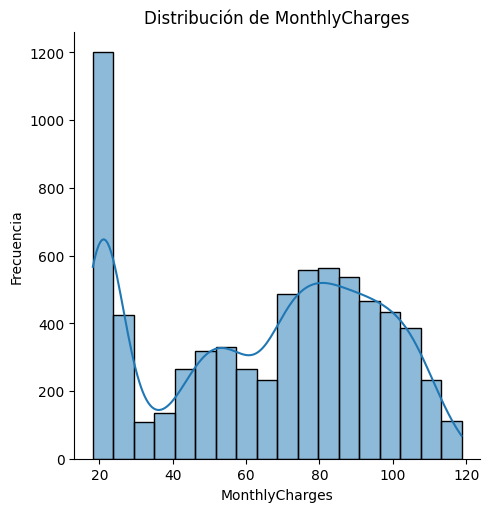

In [ ]:
sns.displot(data=df['MonthlyCharges'], kde=True)
plt.title('Distribución de MonthlyCharges')
plt.xlabel('MonthlyCharges')
plt.ylabel('Frecuencia')
plt.show()

I noticed there aren´t atipical data in MonthlyCharges variables due to std isn´t bigger than the mean and in histogram it doesn´t show something different

Also, when we identify the behavior of MonthlyCharges, thi shows there are a lot of customers with cheap services but the behavior chenge between 40 and 120 dollars charges,which looks like a normal distribution

###  TotalCharges


In [ ]:
df['TotalCharges'].describe()

,TotalCharges
count,7032.000000
mean,2283.300441
std,2266.771362
min,18.800000
25%,401.450000
50%,1397.475000
75%,3794.737500
max,8684.800000


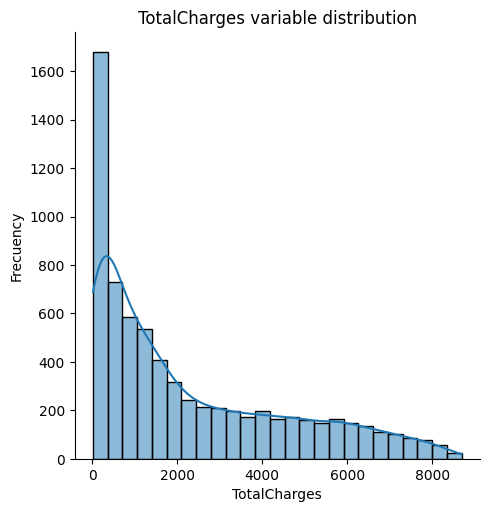

In [ ]:
sns.displot(data=df['TotalCharges'], kde=True)
plt.title('TotalCharges variable distribution')
plt.xlabel('TotalCharges')
plt.ylabel('Frecuency')
plt.show()

Owing to mean is bigger than mediana and standar deviation are near, there are more values near to low values in the total charges which makes a bigger dispersation than a balanced distribution. It has a similarity distirbution as an logarithm distribution. These could happen in money variables

###  tenure

In [ ]:
df['tenure'].describe()

,tenure
count,7032.000000
mean,32.421786
std,24.545260
min,1.000000
25%,9.000000
50%,29.000000
75%,55.000000
max,72.000000


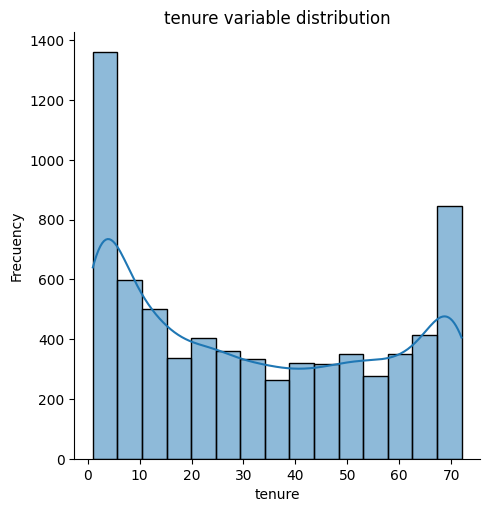

In [ ]:
sns.displot(data=df['tenure'],kde=True)
plt.title('tenure variable distribution')
plt.xlabel('tenure')
plt.ylabel('Frecuency')
plt.show()

This variable has a particular behavior in which the most recent customers and the oldest customers are the most representative quantities. This could be because sales team are catching many people and the comany are retaining the most antique customers of the company, doing great campigns to coth publics. The problem is in the middle people due to the company must to identify how to retain the "new" clients more time with effective campaigns to having better numbers there.

###  Churn

In [ ]:
df['Churn'].describe()

,Churn
count,7032.000000
mean,0.265785
std,0.441782
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
df['Churn'].value_counts()/len(df)

,count
Churn,
0,0.734215
1,0.265785


<Axes: xlabel='Churn', ylabel='count'>

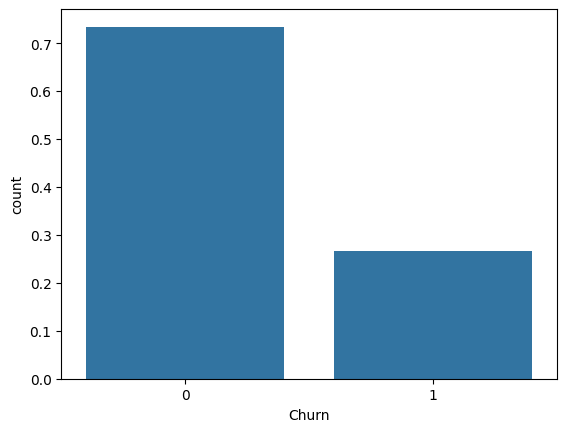

In [ ]:
sns.barplot(data=df['Churn'].value_counts()/len(df),)

,count
Churn,
0,5163
1,1869


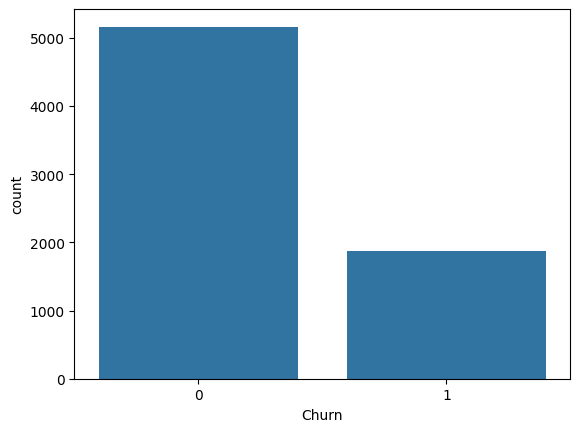

In [ ]:
sns.countplot(data = df, x = "Churn")
#df.groupby('Churn').size()
df['Churn'].value_counts()

26.6 % represents customer churn of the total customer

### gender
  

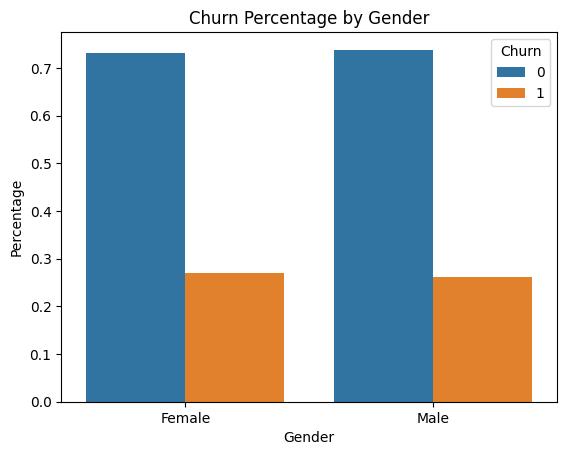

In [ ]:
# Calculate the churn percentage for each gender
churn_by_gender = df.groupby('gender')['Churn'].value_counts(normalize=True).rename('percentage').reset_index()

# Plot the data
sns.barplot(data=churn_by_gender, x='gender', y='percentage', hue='Churn')
plt.title('Churn Percentage by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()

In [ ]:
(df[['gender', 'Churn']].groupby(['gender'], as_index=True).agg(['count','sum','mean']).sort_values(('Churn','mean'),ascending=False))

Churn               
       count  sum      mean
gender                     
Female  3483  939  0.269595
Male    3549  930  0.262046

a gender variable category doesn´t affect significatively in customer churn due to being male or female have similar proportion of customer churn with the general proportiion (26%)

###  SeniorCitizen

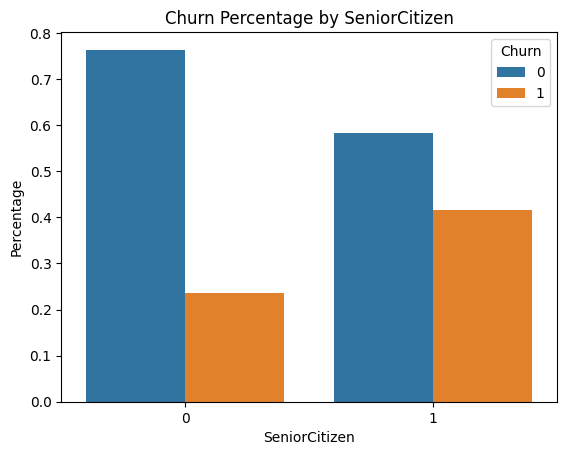

In [ ]:
churn_by_seniorcitien=df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).rename('percentage').reset_index()
sns.barplot(data=churn_by_seniorcitien, x='SeniorCitizen', y='percentage', hue='Churn')
plt.title('Churn Percentage by SeniorCitizen')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage')
plt.show()

In [ ]:
(df[['SeniorCitizen', 'Churn']].groupby(['SeniorCitizen'], as_index=True).agg(['count','sum','mean']).sort_values(('Churn','mean'),ascending=False))

Churn                
              count   sum      mean
SeniorCitizen                      
1              1142   476  0.416813
0              5890  1393  0.236503

Being a senior citizen have a representative influence when a custmer churn from any company service because it has a proportion bigger than general customer churn proportion (41%)

###  Partner

In [ ]:
partner_by_churn=df[['Partner', 'Churn']].groupby('Partner').value_counts(normalize=True).rename('percentage').reset_index()
print(partner_by_churn)


  Partner  Churn  percentage
0      No      0    0.670239
1      No      1    0.329761
2     Yes      0    0.802829
3     Yes      1    0.197171


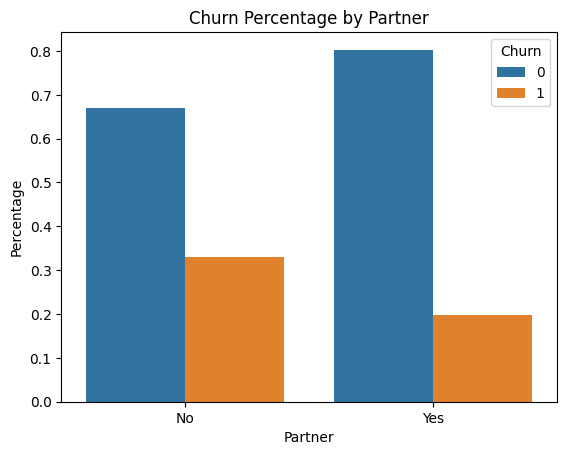

In [ ]:
sns.barplot(data=partner_by_churn,x='Partner',y='percentage',hue='Churn')
plt.title('Churn Percentage by Partner')
plt.xlabel('Partner')
plt.ylabel('Percentage')
plt.show()

In [ ]:
(df[['Partner','Churn']].groupby('Partner')).agg(['count','sum','mean']).sort_values(('Churn','mean'),ascending=True)

Churn                
        count   sum      mean
Partner                      
Yes      3393   669  0.197171
No       3639  1200  0.329761

If a customer has partner, it increases the probability of being a churned customer

###  Dependents

In [ ]:
dependent_churn=df[['Churn','Dependents']].groupby('Dependents').value_counts(normalize=True).rename('percentage').reset_index()
print(dependent_churn)

  Dependents  Churn  percentage
0         No      0    0.687209
1         No      1    0.312791
2        Yes      0    0.844688
3        Yes      1    0.155312


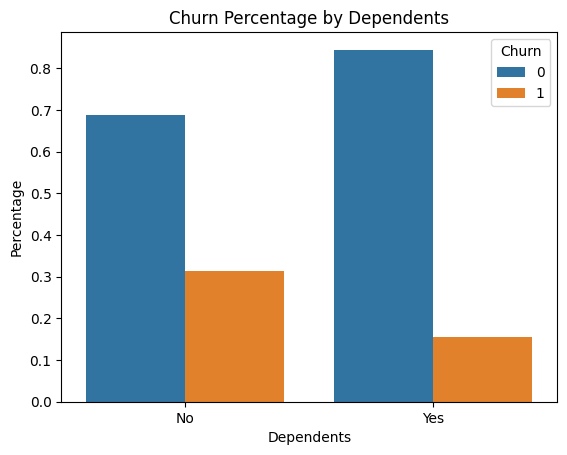

In [ ]:
sns.barplot(data=dependent_churn,x='Dependents',y='percentage',hue='Churn')
plt.title('Churn Percentage by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Percentage')
plt.show()

In [ ]:
(df[['Churn','Dependents']].groupby('Dependents')).agg(['count','sum','mean']).sort_values(('Churn','mean'),ascending=True)

Churn                
           count   sum      mean
Dependents                      
Yes         2099   326  0.155312
No          4933  1543  0.312791

Having dependents isn´t a meaningful variable to influence churn customers

###  PhoneService

In [ ]:
phoneservice_churn=df[['PhoneService','Churn']].groupby('PhoneService').value_counts(normalize=True).rename('percentage').reset_index()
print(phoneservice_churn)

  PhoneService  Churn  percentage
0           No      0    0.750000
1           No      1    0.250000
2          Yes      0    0.732525
3          Yes      1    0.267475


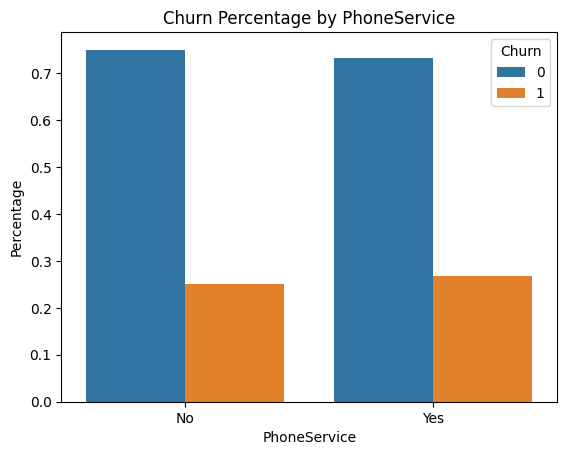

In [ ]:
sns.barplot(data=phoneservice_churn,x='PhoneService',y='percentage',hue='Churn')
plt.title('Churn Percentage by PhoneService')
plt.xlabel('PhoneService')
plt.ylabel('Percentage')
plt.show()

In [ ]:
(df[['PhoneService','Churn']].groupby('PhoneService')).agg(['count','sum','mean']).sort_values(('Churn','mean'),ascending=True)

Churn                
             count   sum      mean
PhoneService                      
No             680   170  0.250000
Yes           6352  1699  0.267475

Having phone service doesn´t affect much in customer churn

### MultipleLines


In [ ]:
multiplelines_churn = df[['MultipleLines','Churn']].groupby('MultipleLines').value_counts(normalize=True).rename('percentage').reset_index()
print(multiplelines_churn)

      MultipleLines  Churn  percentage
0                No      0    0.749188
1                No      1    0.250812
2  No phone service      0    0.750000
3  No phone service      1    0.250000
4               Yes      0    0.713515
5               Yes      1    0.286485


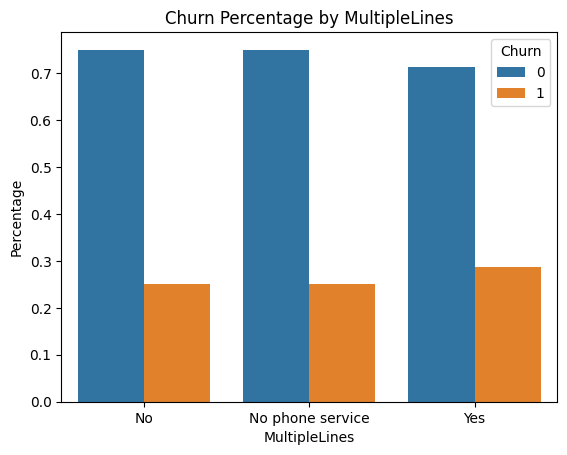

In [ ]:
sns.barplot(data=multiplelines_churn,x='MultipleLines', y='percentage', hue='Churn')
plt.title('Churn Percentage by MultipleLines')
plt.xlabel('MultipleLines')
plt.ylabel('Percentage')
plt.show()

In [ ]:
(df[['MultipleLines','Churn']].groupby('MultipleLines')).agg(['count','sum','mean']).sort_values(('Churn','mean'),ascending=True)

Churn               
                 count  sum      mean
MultipleLines                        
No phone service   680  170  0.250000
No                3385  849  0.250812
Yes               2967  850  0.286485

multiple lines phone service doesn´t influence on customer churn

### InternetService


In [ ]:
internetservice_churn=df[['InternetService','Churn']].groupby('InternetService').value_counts(normalize=True).reset_index()
print(internetservice_churn)

  InternetService  Churn  proportion
0             DSL      0    0.810017
1             DSL      1    0.189983
2     Fiber optic      0    0.581072
3     Fiber optic      1    0.418928
4              No      0    0.925658
5              No      1    0.074342


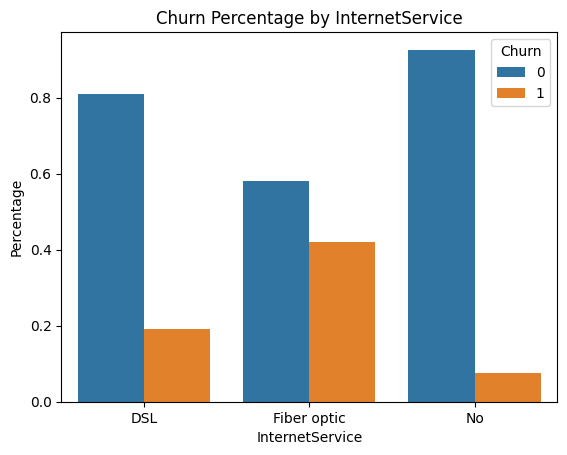

In [ ]:
sns.barplot(data=internetservice_churn,x='InternetService',y='proportion',hue='Churn')
plt.title('Churn Percentage by InternetService')
plt.xlabel('InternetService')
plt.ylabel('Percentage')
plt.show()

In [ ]:
(df[['InternetService','Churn']].groupby('InternetService')).agg(['count','sum','mean']).sort_values(('Churn','mean'),ascending=True)

Churn                
                count   sum      mean
InternetService                      
No               1520   113  0.074342
DSL              2416   459  0.189983
Fiber optic      3096  1297  0.418928

Having fiber optic have a big influence on churn impact due to it´s proportion is bigger than general churn custmer proporton (41.9%)

###  OnlineBackup

In [ ]:
onlinebackup_churn=df[['OnlineBackup','Churn']].groupby('OnlineBackup').value_counts(normalize=True).rename('percentage').reset_index()
print(onlinebackup_churn)

          OnlineBackup  Churn  percentage
0                   No      0    0.600583
1                   No      1    0.399417
2  No internet service      0    0.925658
3  No internet service      1    0.074342
4                  Yes      0    0.784330
5                  Yes      1    0.215670


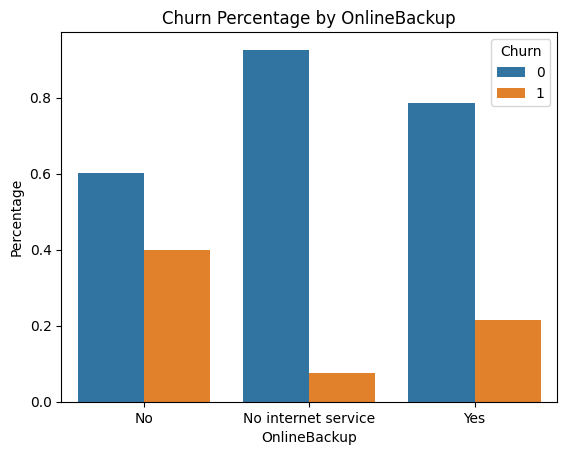

In [ ]:
sns.barplot(data=onlinebackup_churn,x='OnlineBackup',y='percentage',hue='Churn')
plt.title('Churn Percentage by OnlineBackup')
plt.xlabel('OnlineBackup')
plt.ylabel('Percentage')
plt.show()

In [ ]:
(df[['OnlineBackup','Churn']].groupby('OnlineBackup')).agg(['count','sum','mean']).sort_values(('Churn','mean'),ascending=True)

Churn                
                    count   sum      mean
OnlineBackup                             
No internet service  1520   113  0.074342
Yes                  2425   523  0.215670
No                   3087  1233  0.399417

Don´t having OnlineBackUp has influence on customer churn owning to it´s proportion is bigger than general customer churn proprotion (39.9%)

###  DeviceProtection

In [ ]:
deviceprotection_churn=df[['DeviceProtection','Churn']].groupby('DeviceProtection').value_counts(normalize=True).rename('percentage').reset_index()
print(deviceprotection_churn)

      DeviceProtection  Churn  percentage
0                   No      0    0.608597
1                   No      1    0.391403
2  No internet service      0    0.925658
3  No internet service      1    0.074342
4                  Yes      0    0.774607
5                  Yes      1    0.225393


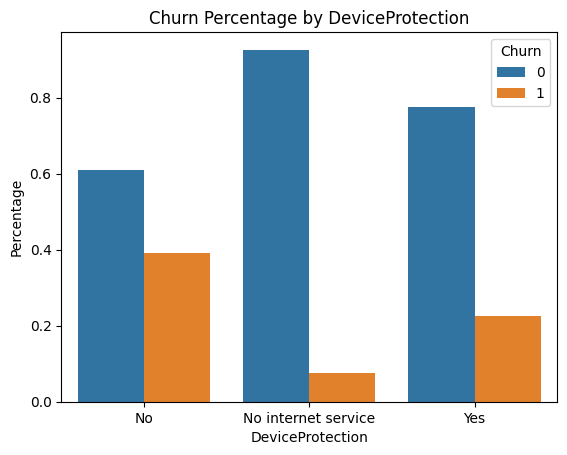

In [ ]:
sns.barplot(data=deviceprotection_churn,x='DeviceProtection',y='percentage',hue='Churn')
plt.title('Churn Percentage by DeviceProtection')
plt.xlabel('DeviceProtection')
plt.ylabel('Percentage')
plt.show()

In [ ]:
(df[['DeviceProtection','Churn']].groupby('DeviceProtection')).agg(['count','sum','mean']).sort_values(('Churn','mean'),ascending=True)

Churn                
                    count   sum      mean
DeviceProtection                         
No internet service  1520   113  0.074342
Yes                  2418   545  0.225393
No                   3094  1211  0.391403

Don´t having Device Protection has influence on customer churn owning to it´s proportion is bigger than general customer churn proprotion (39.1%)

###  TechSupport

In [ ]:
techsupport_churn=df[['TechSupport','Churn']].groupby('TechSupport').value_counts(normalize=True).rename('percentage').reset_index()
print(techsupport_churn)

           TechSupport  Churn  percentage
0                   No      0    0.583525
1                   No      1    0.416475
2  No internet service      0    0.925658
3  No internet service      1    0.074342
4                  Yes      0    0.848039
5                  Yes      1    0.151961


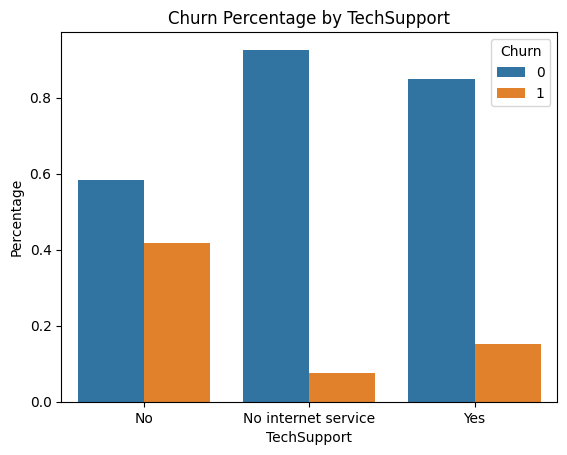

In [ ]:
sns.barplot(data=techsupport_churn,x='TechSupport',y='percentage',hue='Churn')
plt.title('Churn Percentage by TechSupport')
plt.xlabel('TechSupport')
plt.ylabel('Percentage')
plt.show()

In [ ]:
(df[['TechSupport','Churn']].groupby('TechSupport')).agg(['count','sum','mean']).sort_values(('Churn','mean'),ascending=True)

Churn                
                    count   sum      mean
TechSupport                              
No internet service  1520   113  0.074342
Yes                  2040   310  0.151961
No                   3472  1446  0.416475

Don´t having Tech Support OnlineBackUp has influence on customer churn owning to it´s proportion is bigger than general customer churn proprotion (41.6 %)

###  StreamingTV

In [ ]:
streamingtv_churn=df[['Churn','StreamingTV']].groupby('StreamingTV').value_counts(normalize=True).rename('percentage').reset_index()
print(streamingtv_churn)

           StreamingTV  Churn  percentage
0                   No      0    0.664649
1                   No      1    0.335351
2  No internet service      0    0.925658
3  No internet service      1    0.074342
4                  Yes      0    0.698853
5                  Yes      1    0.301147


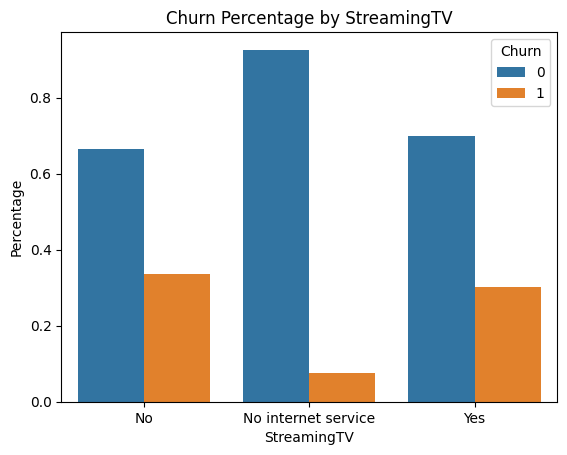

In [ ]:
sns.barplot(data=streamingtv_churn,x='StreamingTV',y='percentage',hue='Churn')
plt.title('Churn Percentage by StreamingTV')
plt.xlabel('StreamingTV')
plt.ylabel('Percentage')
plt.show()

In [ ]:
(df[['Churn','StreamingTV']].groupby('StreamingTV')).agg(['count','sum','mean']).sort_values(('Churn','mean'),ascending=True)

Churn               
                    count  sum      mean
StreamingTV                             
No internet service  1520  113  0.074342
Yes                  2703  814  0.301147
No                   2809  942  0.335351

Don´t having Streaming TV has influence on customer churn owning to it´s proportion is bigger than general customer churn proprotion (33.5%)

###  Contract

In [ ]:
contract_churn=df[['Churn','Contract']].groupby('Contract').value_counts(normalize=True).rename('percentage').reset_index()
print(contract_churn)

         Contract  Churn  percentage
0  Month-to-month      0    0.572903
1  Month-to-month      1    0.427097
2        One year      0    0.887228
3        One year      1    0.112772
4        Two year      0    0.971513
5        Two year      1    0.028487


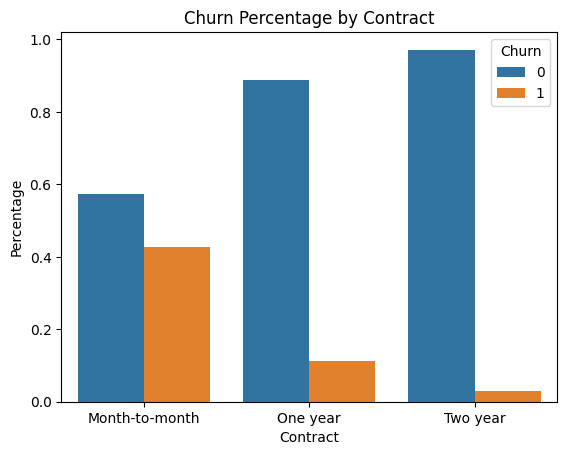

In [ ]:
sns.barplot(data=contract_churn,x='Contract',y='percentage',hue='Churn')
plt.title('Churn Percentage by Contract')
plt.xlabel('Contract')
plt.ylabel('Percentage')
plt.show()

In [ ]:
(df[['Churn','Contract']].groupby('Contract')).agg(['count','sum','mean']).sort_values(('Churn','mean'),ascending=True)

Churn                
               count   sum      mean
Contract                            
Two year        1685    48  0.028487
One year        1472   166  0.112772
Month-to-month  3875  1655  0.427097

Month to month contract duration has influence on customer churn owning to it´s proportion is bigger than general customer churn proprotion (42.7%)

###  PaperlessBilling


In [ ]:
paperlessbilling_churn=df[['Churn','PaperlessBilling']].groupby('PaperlessBilling').value_counts(normalize=True).rename('percentage').reset_index()
print(paperlessbilling_churn)

  PaperlessBilling  Churn  percentage
0               No      0    0.836243
1               No      1    0.163757
2              Yes      0    0.664107
3              Yes      1    0.335893


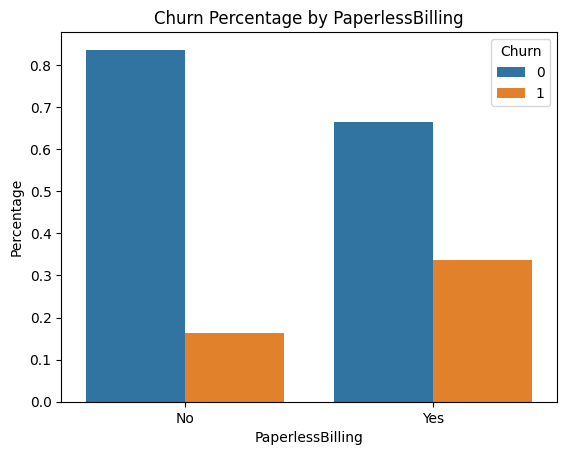

In [ ]:
sns.barplot(data=paperlessbilling_churn,x='PaperlessBilling',y='percentage',hue='Churn')
plt.title('Churn Percentage by PaperlessBilling')
plt.xlabel('PaperlessBilling')
plt.ylabel('Percentage')
plt.show()

In [ ]:
(df[['Churn','PaperlessBilling']].groupby('PaperlessBilling')).agg(['count','sum','mean']).sort_values(('Churn','mean'),ascending=True)

Churn                
                 count   sum      mean
PaperlessBilling                      
No                2864   469  0.163757
Yes               4168  1400  0.335893

Having paper less billing has influence on customer churn owning to it´s proportion is bigger than general customer churn proprotion (33.5 %)

###  PaymentMethod

In [ ]:
paymentmethod_churn=df[['Churn','PaymentMethod']].groupby('PaymentMethod').value_counts(normalize=True).rename('percentage').reset_index()
print(paymentmethod_churn)

               PaymentMethod  Churn  percentage
0  Bank transfer (automatic)      0    0.832685
1  Bank transfer (automatic)      1    0.167315
2    Credit card (automatic)      0    0.847469
3    Credit card (automatic)      1    0.152531
4           Electronic check      0    0.547146
5           Electronic check      1    0.452854
6               Mailed check      0    0.807980
7               Mailed check      1    0.192020


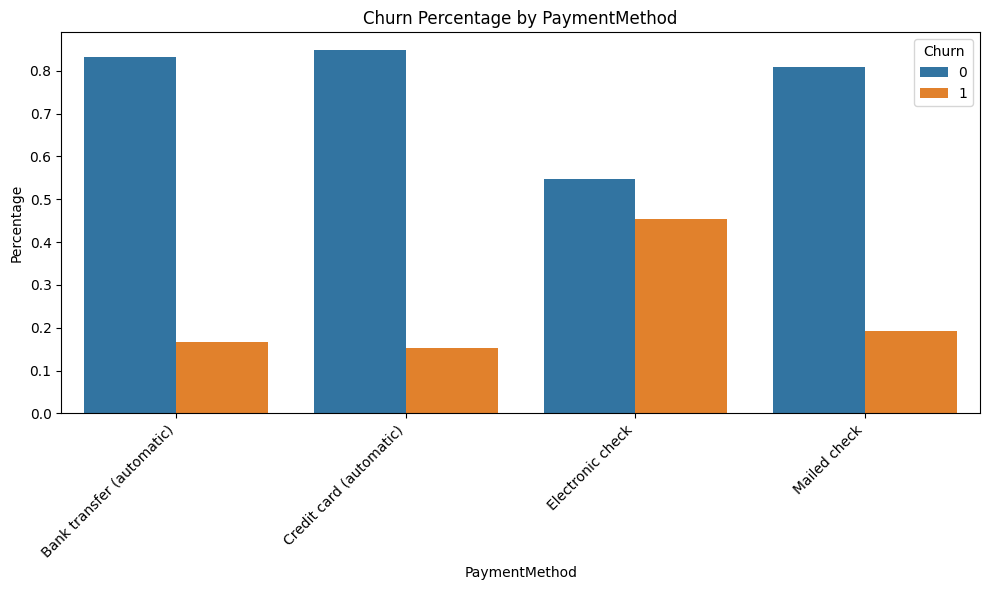

In [ ]:
plt.figure(figsize=(10, 6)) # Adjust the figure size as needed
sns.barplot(data=paymentmethod_churn,x='PaymentMethod',y='percentage',hue='Churn')
plt.title('Churn Percentage by PaymentMethod')
plt.xlabel('PaymentMethod')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
(df[['Churn','PaymentMethod']].groupby('PaymentMethod')).agg(['count','sum','mean']).sort_values(('Churn','mean'),ascending=True)

Churn                
                          count   sum      mean
PaymentMethod                                  
Credit card (automatic)    1521   232  0.152531
Bank transfer (automatic)  1542   258  0.167315
Mailed check               1604   308  0.192020
Electronic check           2365  1071  0.452854

Having electronic check as payment method has influence on customer churn owning to it´s proportion is bigger than general customer churn proprotion (45.2%)

## Correlation Analysis

Correlation analysis have to be apply only on numerical varibles due to categorical variables don´t have direction or magnitud to create a correlation matrix by a regression linear model

In [ ]:
numerical_columns=['SeniorCitizen','tenure','MonthlyCharges','TotalCharges','Churn']

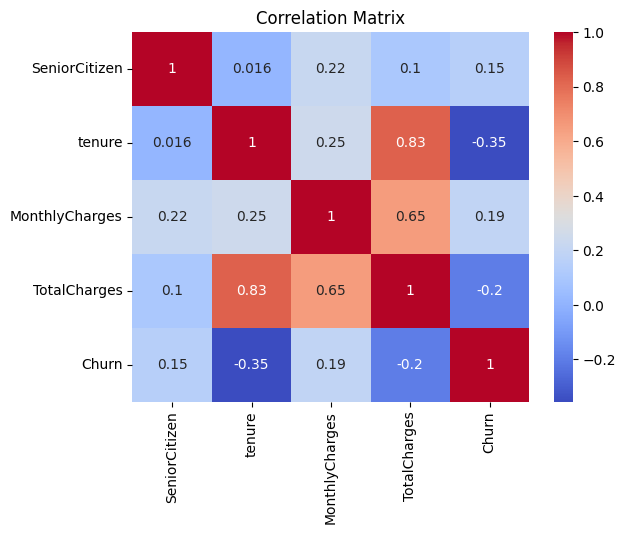

In [ ]:
correlated_matrix=df[numerical_columns].corr()
sns.heatmap(correlated_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

TotalCharges and tenure have a strong positive correlation, which means if a customer has been more time using company services, he would have bigger total charges.

Also, monthly charges and total charges have a strong positive correlation (0.65). it is logic due to if your monhtly bill have a bg value, it will impact on total charges of the year surely

Finally, churn and tenure has a weak negative correlation. if customer has more time taking a company service, the probability of being a churn customer is less than if the customer has been short time

## Mutivariable Analysis

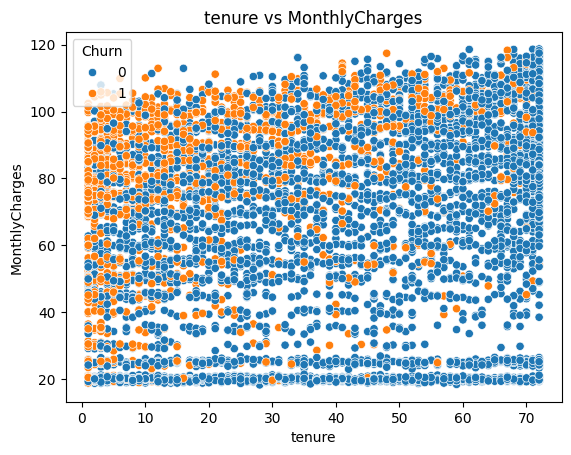

In [ ]:
sns.scatterplot(data=df,x='tenure',y='MonthlyCharges',hue='Churn')
plt.title('tenure vs MonthlyCharges')
plt.show()
#

The last visualization shows being using more time company service could reduce the probability of being a churned customer due to the density of points which represente churned customer ar more at the begining of x axis than the end of it.

In the case of monthly charges, it isn´t to clear as the tenire variable, but it seems more monthly charges could imply on more probability of being churned customer.

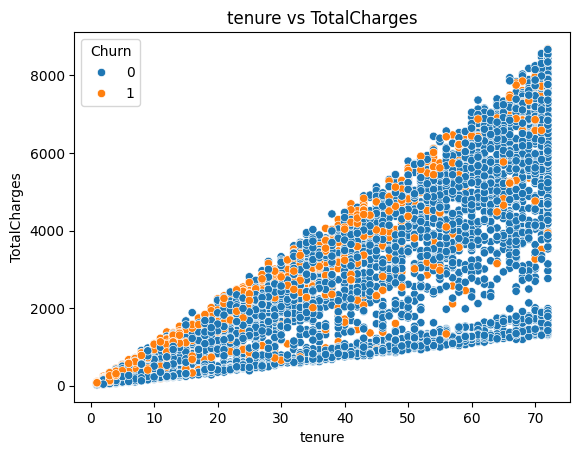

In [ ]:
sns.scatterplot(data=df,x='tenure',y='TotalCharges',hue='Churn')
plt.title('tenure vs TotalCharges')
plt.show()
#

Look into tenure variable, it seemes that look into eah tenure group, the probability is better of being a churned customer if he is part of the biggest total charges in comparisson with the customer that have a similar oldest duration with the company. That means, if the customer feels the company is giving him a bigger charge than the other customer with the same antique, probably, they wouldnpt feel appreciated by the company, giving a reason to cancelled the contract with the company and start looking into other brands.

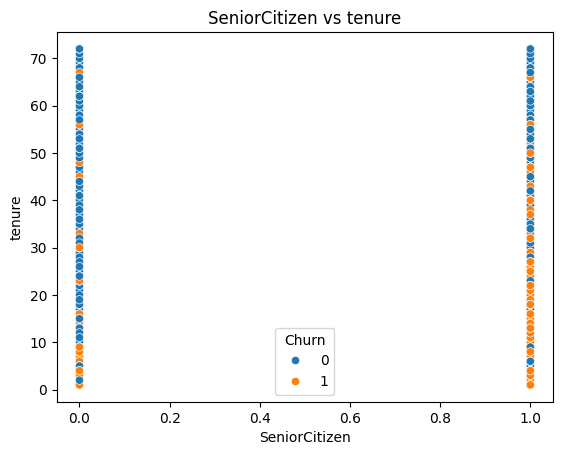

In [ ]:
sns.scatterplot(data=df,x='SeniorCitizen',y='tenure',hue='Churn')
plt.title('SeniorCitizen vs tenure')
plt.show()
#

Being a senior citizen with shor time taking company services (short tenure), increase the probability of being a churned customer. That means, senior customers are more volatile with being with an unique company with tecnological services. This could be by their insufficient expirience using tecnological devices.

# 5. MODELING

## Last Previous Preparation

We need a base model to compare the rest of model with this and improving it measure. In this case, we will use as metric the

Before beginning with the models, we edentify before son correlated variables. That means we must select one of them to not "repeat" the information and skew the model. There is ternure and total charges, and we select ternure because total charges info could be related with monthly charges if we only use the context

In [ ]:
df=df.drop('TotalCharges',axis=1)

Also, customerID variable doesn´t give us relevant information and for that reason we will drop it

In [ ]:
df=df.drop('customerID',axis=1)

Before start, classfier models such as logistic regression, SVM and neural network don´t accept qualitative variables. That means, if we have categorical ones, we must change them to "numerical" with the function "one-hot-encoding" or "label-encoding".

In [ ]:
nominal_categorical=['gender','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
encoder=OneHotEncoder(sparse_output=False)
encoded_data=encoder.fit_transform(df[nominal_categorical])
encoded_df=pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out(nominal_categorical))

In [ ]:
len(encoded_df)

7032

In [ ]:
df_final=pd.concat([df,encoded_df],axis=1)
df_final=df_final.drop(nominal_categorical,axis=1)

In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 45 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   Churn                                    7032 non-null   int64  
 4   gender_Female                            7032 non-null   float64
 5   gender_Male                              7032 non-null   float64
 6   Partner_No                               7032 non-null   float64
 7   Partner_Yes                              7032 non-null   float64
 8   Dependents_No                            7032 non-null   float64
 9   Dependents_Yes                           7032 non-null   float64
 10  PhoneService_No                          7032 no

There are some variables with the same information but opposite because they were binary variabkes. For that reason we drop them to donpt have dupplicated information

In [ ]:
df_final=df_final.drop(['gender_Female','Partner_No','Dependents_No','PhoneService_No','PaperlessBilling_No'],axis=1)

In [ ]:
X=df_final.drop('Churn', axis=1)
print(X)

      SeniorCitizen  tenure  MonthlyCharges  gender_Male  Partner_Yes  \
0                 0       1           29.85          0.0          1.0   
1                 0      34           56.95          1.0          0.0   
2                 0       2           53.85          1.0          0.0   
3                 0      45           42.30          1.0          0.0   
4                 0       2           70.70          0.0          0.0   
...             ...     ...             ...          ...          ...   
7027              0      24           84.80          1.0          1.0   
7028              0      72          103.20          0.0          1.0   
7029              0      11           29.60          0.0          1.0   
7030              1       4           74.40          1.0          1.0   
7031              0      66          105.65          1.0          0.0   

      Dependents_Yes  PhoneService_Yes  MultipleLines_No  \
0                0.0               0.0               0.0   
1  

In [ ]:
Y=df_final['Churn']
print(Y)

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
print(f'X train length is {len(X_train)}')
print(f'X test length is {len(X_test)}')
print(f'Y train length is {len(Y_train)}')
print(f'Y test length is {len(Y_test)}')

X train length is 5625
X test length is 1407
Y train length is 5625
Y test length is 1407


For this project, Recall will be the most important metric to evaluate the models because it´s too important for teh company identifying all the possible customer that could go out from the company, to reduce the % of it.

## Model 1 - Logistic Regression

In [ ]:
pipeline_log1=Pipeline([('scaler',StandardScaler()),('model',LogisticRegression())])
pipeline_log1.fit(X_train,Y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

In [ ]:
y_pred1=pipeline_log1.predict(X_test)

In [ ]:
print(classification_report(Y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.53      0.58       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



We noticed that Recall metric has a value of 0.52. These means the model it´s detecting only the middle of all the churned customers.

Also, if we look into precision, the model detect truely the 63% of the churned customers. It means the model is detecting wrong some customers as churned.

Finally, when we analyzed Not churned customers, the models is detecting well them, which is the opposite of what we are looking for.

Maeby a reason could be there are too much variables ans we need to reduced them (44 variables) due to when we dummified them, it increases a lot.

In [ ]:
coefficients=pipeline_log1.named_steps['model'].coef_[0]

feature_importance=pd.DataFrame({'feature':X.columns,'coefficientes':coefficients})

#Now we calculate absolute values of coefficientes
feature_importance['abs_coefficientes']=abs(coefficients)

feature_importance.sort_values(by='abs_coefficientes',ascending=False, inplace=True)

In [ ]:
print(feature_importance.head(10))

                        feature  coefficientes  abs_coefficientes
1                        tenure      -0.845621           0.845621
2                MonthlyCharges      -0.581863           0.581863
11  InternetService_Fiber optic       0.379060           0.379060
10          InternetService_DSL      -0.310432           0.310432
31      Contract_Month-to-month       0.307295           0.307295
33            Contract_Two year      -0.298807           0.298807
30          StreamingMovies_Yes       0.168033           0.168033
27              StreamingTV_Yes       0.163805           0.163805
34         PaperlessBilling_Yes       0.131367           0.131367
13            OnlineSecurity_No       0.116438           0.116438


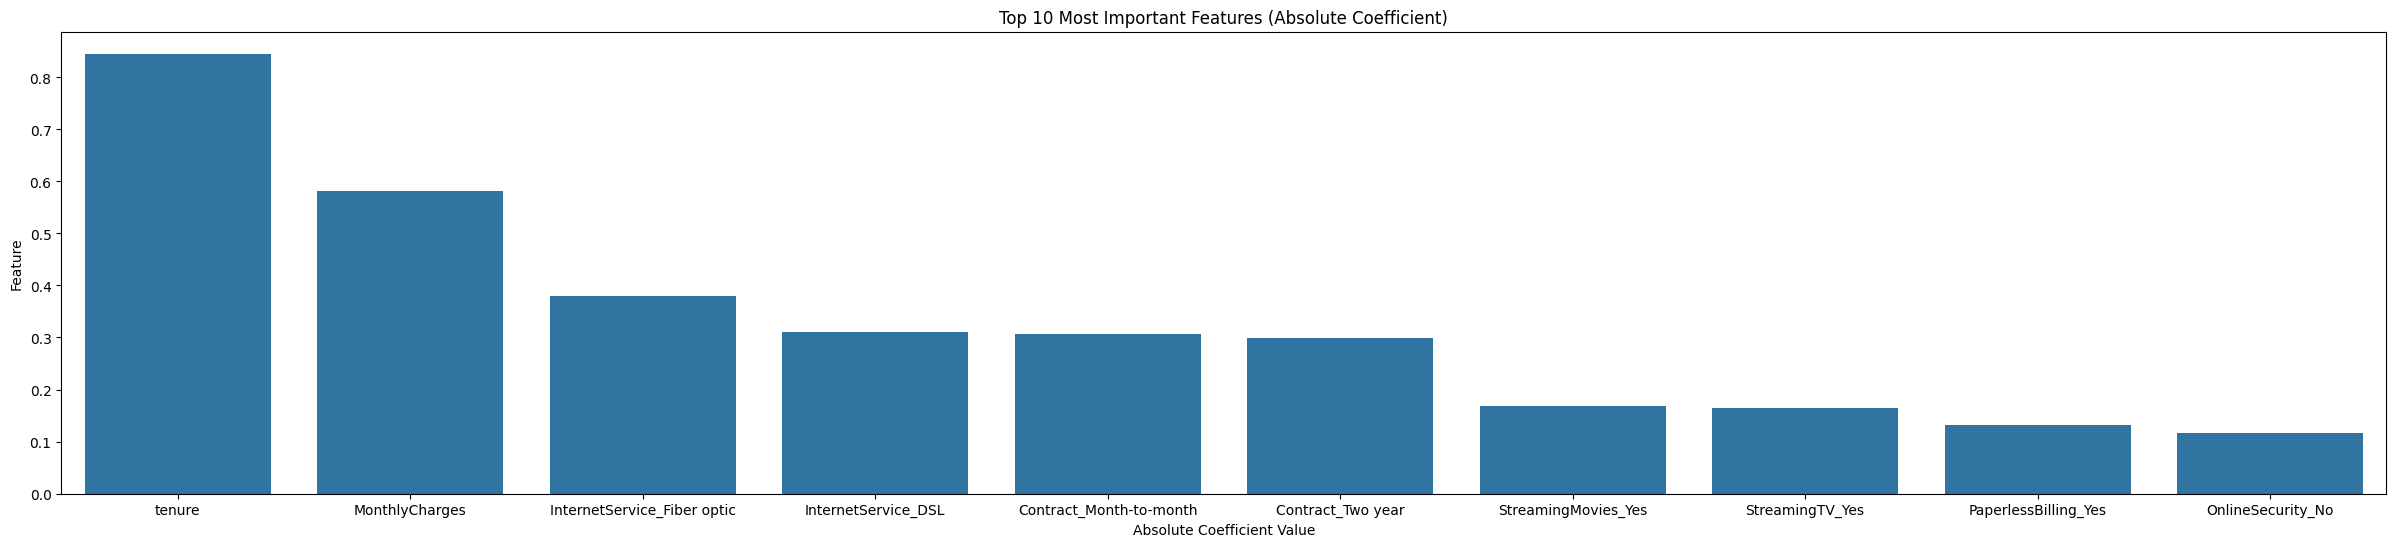

In [ ]:
top_n=10
plt.figure(figsize=(30,6))
sns.barplot(data=feature_importance.head(top_n), x='feature', y='abs_coefficientes')
plt.title('Top 10 Most Important Features (Absolute Coefficient)')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

Now, we tryed again only with the most representative variables

In [ ]:
X_reduced1=X[['tenure','MonthlyCharges','InternetService_DSL','InternetService_Fiber optic','Contract_Month-to-month','Contract_Two year','StreamingMovies_Yes','StreamingTV_Yes','OnlineSecurity_No','PaperlessBilling_Yes']]

In [ ]:
X_train_red1,X_test_red1,Y_train_red1,Y_test_red1=train_test_split(X_reduced1,Y,test_size=0.2,random_state=42)

In [ ]:
pipeline_log2=Pipeline([('scaler',StandardScaler()),('model',LogisticRegression())])

In [ ]:
pipeline_log2.fit(X_train_red1,Y_train_red1)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LogisticRegression())])

In [ ]:
y_pred2=pipeline_log2.predict(X_test_red1)

In [ ]:
classification_report_model2=classification_report(Y_test_red1,y_pred2)
print(classification_report_model2)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



We will tried with a parameter grid in the logistic regression to obtain it´s best result with the best parameters

In [ ]:
param_grid = {
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'model__penalty': ['l1', 'l2'], # Penalty norm
    'model__solver': ['liblinear', 'saga'] # Solver
}

In [ ]:
def objetive(trial):
    C = trial.suggest_float('C', 0.001, 100, log=True)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])

    # Use solvers that support both 'l1' and 'l2' penalties
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])


    pipeline_log3 = Pipeline([
        ('scaler', StandardScaler()),
        ('model', LogisticRegression(C=C, penalty=penalty, solver=solver, random_state=42))
    ])

    pipeline_log3.fit(X_train_red1, Y_train_red1)
    y_pred3 = pipeline_log3.predict(X_test_red1)
    recall = recall_score(Y_test_red1, y_pred3)

    return recall

In [ ]:
study=optuna.create_study(direction='maximize')
study.optimize(objetive,n_trials=100)

In [ ]:
study.best_trial.value

0.5721925133689839

In [ ]:
study.best_trial.params

{'penalty': 'l2', 'solver': 'liblinear', 'C': 0.0010335865990679066}

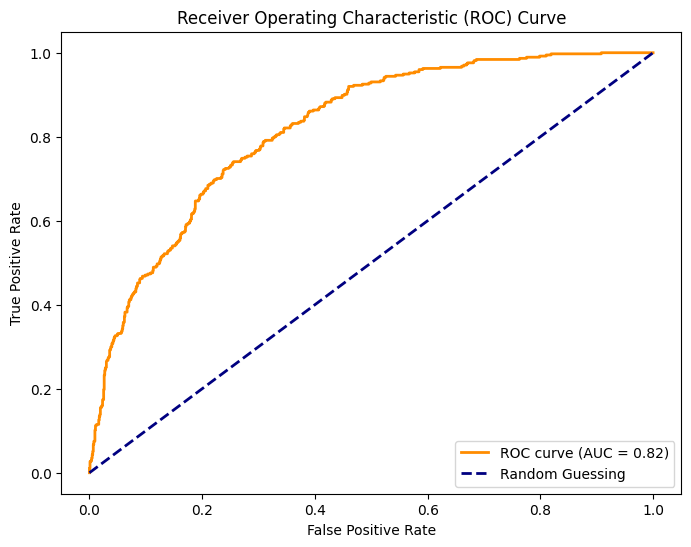

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Get the best parameters from the Optuna study
best_params = study.best_trial.params

# Create a new pipeline with the best parameters
best_log_model_optuna = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], solver=best_params['solver'], random_state=42))
])

# Train the best model on the training data
best_log_model_optuna.fit(X_train_red1, Y_train_red1)

# Predict probabilities on the test set
y_prob_optuna = best_log_model_optuna.predict_proba(X_test_red1)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test_red1, y_prob_optuna)

# Calculate AUC
roc_auc = roc_auc_score(Y_test_red1, y_prob_optuna)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Model 2 - SVM

In [ ]:
from sklearn.svm import SVC

# Create a pipeline with StandardScaler and SVC
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(random_state=42))
])

# Train the pipeline on the training data
pipeline_svm.fit(X_train, Y_train)

# Make predictions on the test data
y_pred_svm = pipeline_svm.predict(X_test)

# Print the classification report
print("Classification Report for SVM Model:")
print(classification_report(Y_test_red1, y_pred_svm))

Classification Report for SVM Model:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



In [ ]:
grid_param_SVM={
    'C':[0.1,1,10,100],
    'gamma':[1,0.1,0.01,0.001,'scale','auto'],
    'kernel':['rbf','poly','linear','sigmoid','tanh'],
    'class_weight':['balanced']
}

In [ ]:
def objective_svm(trial):
    C = trial.suggest_float('C', 0.1,100, log=True)
    choice = trial.suggest_categorical('gamma_type', ['auto', 'scale', 'numeric'])
    if choice in ['auto', 'scale']:
        gamma = choice
    else:
        gamma = trial.suggest_loguniform('gamma_value', 1e-3, 10)

    kernel=trial.suggest_categorical('kernel',['rbf','poly','linear','sigmoid'])
    class_weight=trial.suggest_categorical('class_weight',['balanced'])

    model=Pipeline([('scaler',StandardScaler()),('SVM',SVC(C=C,kernel=kernel,gamma=gamma,class_weight=class_weight))])
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)
    recall=recall_score(Y_test,y_pred)

    return recall

In [ ]:
study2=optuna.create_study(direction='maximize')
study2.optimize(objective_svm,n_trials=10)

[I 2025-11-12 15:08:40,535] A new study created in memory with name: no-name-37dd446b-e6c7-4bb7-8c73-890c84d8e88c
/tmp/ipython-input-4177771182.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma_value', 1e-3, 10)
[I 2025-11-12 15:08:42,693] Trial 0 finished with value: 0.8315508021390374 and parameters: {'C': 0.2122736566047546, 'gamma_type': 'numeric', 'gamma_value': 0.005471936455910453, 'kernel': 'sigmoid', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.8315508021390374.
[I 2025-11-12 15:08:44,136] Trial 1 finished with value: 0.7807486631016043 and parameters: {'C': 0.5704224811611848, 'gamma_type': 'auto', 'kernel': 'poly', 'class_weight': 'balanced'}. Best is trial 0 with value: 0.8315508021390374.
[I 2025-11-12 15:08:50,793] Trial 2 finished with value: 0.7005347593582

In [ ]:
print(study2.best_trial.value)
best_params_svm=study2.best_trial.params

0.8315508021390374


In [ ]:
print(best_params_svm)

{'C': 0.2122736566047546, 'gamma_type': 'numeric', 'gamma_value': 0.005471936455910453, 'kernel': 'sigmoid', 'class_weight': 'balanced'}


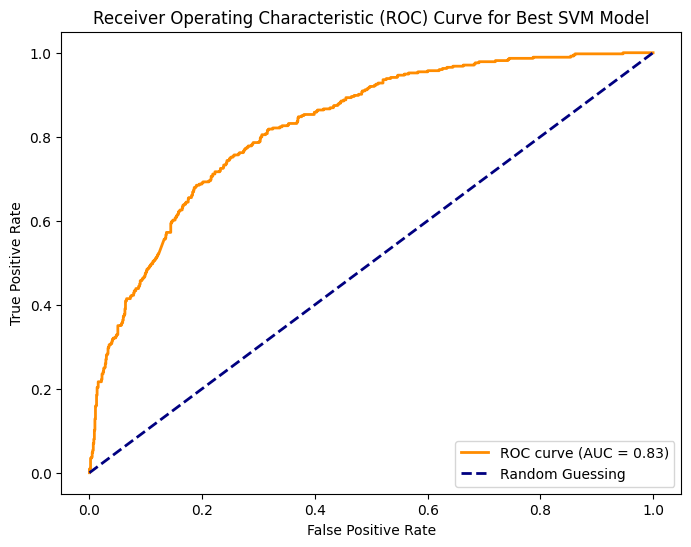

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Get the best parameters from the Optuna study for SVM
best_params_svm = study2.best_trial.params

# Extract gamma based on its type from best_params_svm
if best_params_svm['gamma_type'] in ['auto', 'scale']:
    gamma_value = best_params_svm['gamma_type']
else:
    gamma_value = best_params_svm['gamma_value']

# Create a new pipeline with the best parameters for SVM
best_svm_model_optuna = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC(C=best_params_svm['C'], kernel=best_params_svm['kernel'], gamma=best_params_svm['gamma_value'], class_weight='balanced', probability=True, random_state=42)) # Set probability=True
])

# Train the best SVM model on the training data
best_svm_model_optuna.fit(X_train, Y_train)

# Predict probabilities on the test set for the positive class (Churn=1)
y_prob_svm = best_svm_model_optuna.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_svm, tpr_svm, thresholds_svm = roc_curve(Y_test, y_prob_svm)

# Calculate AUC
roc_auc_svm = roc_auc_score(Y_test, y_prob_svm)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Best SVM Model')
plt.legend(loc='lower right')
plt.show()

In [ ]:
y_pred_svm=best_svm_model_optuna.predict(X_test)

In [ ]:
classification_report_svm=classification_report(Y_test,y_pred_svm)
print(classification_report_svm)

              precision    recall  f1-score   support

           0       0.91      0.65      0.76      1033
           1       0.46      0.83      0.59       374

    accuracy                           0.70      1407
   macro avg       0.69      0.74      0.67      1407
weighted avg       0.79      0.70      0.71      1407



## MODEL 3 - Neuronal Network

The first neural network is simple, that means it has only one layer

In [ ]:
X_train_scaled.shape[0]

5625

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Classification Report for Neural Network Model:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.59      0.56      0.58       374

    accuracy                           0.78      1407
   macro avg       0.72      0.71      0.71      1407
weighted avg       0.78      0.78      0.78      1407

Test Recall: 0.5615


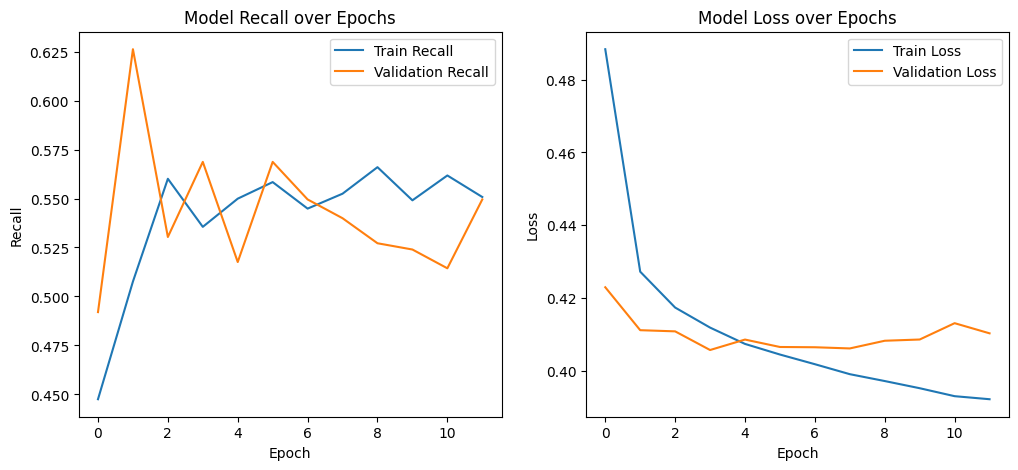

In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

#Build the neural network
model_nn=keras.Sequential([
    keras.layers.Dense(64,activation='relu',input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(1,activation='sigmoid')
])

# Using Adam optimizer and BinaryCrossentropy loss for binary classification
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall(name='recall')])

# Train the model
# Using a validation split to monitor performance during training and early stopping to prevent overfitting
history = model_nn.fit(X_train_scaled, Y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0,
                       callbacks=[keras.callbacks.EarlyStopping(monitor='val_recall', patience=10, mode='max', restore_best_weights=True)])

# Evaluate the model on the test set
Y_pred_proba_nn = model_nn.predict(X_test_scaled)
Y_pred_nn = (Y_pred_proba_nn > 0.5).astype(int) # Convert probabilities to binary predictions

print("\nClassification Report for Neural Network Model:")
print(classification_report(Y_test, Y_pred_nn))
print(f"Test Recall: {recall_score(Y_test, Y_pred_nn):.4f}")

# Plot training history (optional)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['recall'], label='Train Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.title('Model Recall over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Classification Report for Neural Network Model:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.59      0.56      0.58       374

    accuracy                           0.78      1407
   macro avg       0.72      0.71      0.71      1407
weighted avg       0.78      0.78      0.78      1407

Test Recall: 0.5615


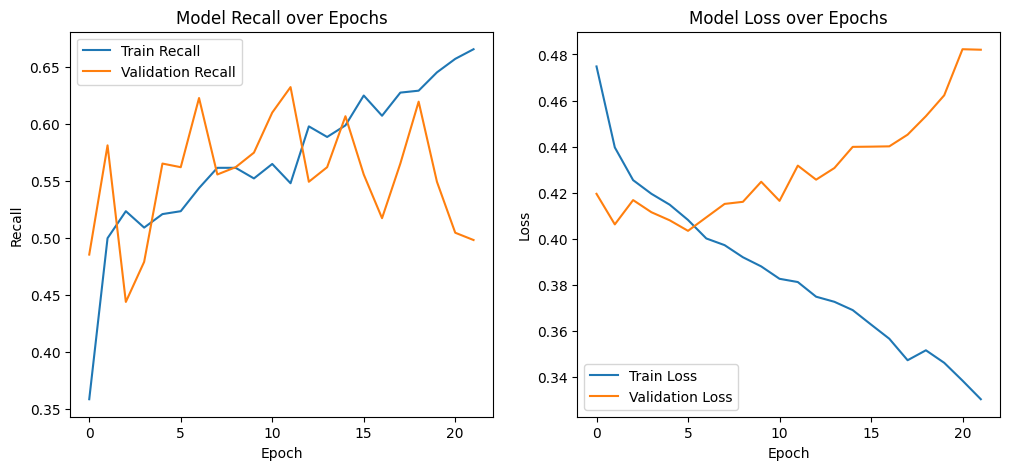

In [ ]:
model_nn2=keras.Sequential([
    keras.layers.Dense(64,activation='relu',input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dropout(0.3), # Dropout layer to prevent overfitting
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dropout(0.3), # Dropout layer to prevent overfitting
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

model_nn2.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall(name='recall')])

# Train the model
# Using a validation split to monitor performance during training and early stopping to prevent overfitting
history = model_nn2.fit(X_train_scaled, Y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0,
                       callbacks=[keras.callbacks.EarlyStopping(monitor='val_recall', patience=10, mode='max', restore_best_weights=True)])

# Evaluate the model on the test set
Y_pred_proba_nn = model_nn.predict(X_test_scaled)
Y_pred_nn = (Y_pred_proba_nn > 0.5).astype(int) # Convert probabilities to binary predictions

print("\nClassification Report for Neural Network Model:")
print(classification_report(Y_test, Y_pred_nn))
print(f"Test Recall: {recall_score(Y_test, Y_pred_nn):.4f}")

# Plot training history (optional)
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['recall'], label='Train Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.title('Model Recall over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


def objective_nn(trial):
  #1. numero de capas
  n_layers=trial.suggest_int('n_layers',1,6)

  #2. Crear modelo
  model=keras.Sequential()

  #Primera capa de input
  model.add(keras.layers.Input(shape=(X_train_scaled.shape[1],)))

  #Capas ocultas dinámicas
  for i in range(n_layers):
    num_neurons=trial.suggest_int(f'units_layer_{i}',16,512)
    activation=trial.suggest_categorical(f'activation_layer_{i}',['relu','tanh','selu'])
    dropout_rate=trial.suggest_float(f'dropout_layer_{i}',0.0,0.5)

    model.add(keras.layers.Dense(num_neurons,activation=activation))
    if dropout_rate>0:
      model.add(keras.layers.Dropout(dropout_rate))

  #Output layer
  model.add(keras.layers.Dense(1,activation='sigmoid'))

  # 4. Optuna optimiza también el learning rate
  lr = trial.suggest_float("lr", 1e-5, 1e-2, log=True)
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

  model.compile(
       optimizer=optimizer,
       loss="binary_crossentropy", # Changed from categorical_crossentropy
       metrics=[tf.keras.metrics.Recall(name='recall')], # Keep recall metric for training
   )

  # 5. Entrenamiento
  batch_size = trial.suggest_int("batch_size", 16, 128)

  model.fit(X_train_scaled,Y_train,validation_split=0.2,epochs=30,batch_size=batch_size,verbose=0) # Changed validation_rate to validation_split

  Y_pred_proba = model.predict(X_test_scaled) # Get probabilities
  Y_pred_binary = (Y_pred_proba > 0.5).astype(int) # Convert to binary predictions

  recall = recall_score(Y_test, Y_pred_binary) # Calculate recall using Y_test and binary predictions

  return recall

#Creamos el estudio
study_nn=optuna.create_study(direction='maximize')
study_nn.optimize(objective_nn,n_trials=10)

[I 2025-11-16 03:47:58,705] A new study created in memory with name: no-name-82b55070-ac4c-4f06-b4f1-137af300e6af


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-11-16 03:48:36,910] Trial 0 finished with value: 0.5775401069518716 and parameters: {'n_layers': 3, 'units_layer_0': 21, 'activation_layer_0': 'selu', 'dropout_layer_0': 0.40376561382561105, 'units_layer_1': 353, 'activation_layer_1': 'selu', 'dropout_layer_1': 0.17283528830571881, 'units_layer_2': 138, 'activation_layer_2': 'selu', 'dropout_layer_2': 0.19048879543462993, 'lr': 0.002721322096159864, 'batch_size': 33}. Best is trial 0 with value: 0.5775401069518716.


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


[I 2025-11-16 03:48:59,927] Trial 1 finished with value: 0.5267379679144385 and parameters: {'n_layers': 1, 'units_layer_0': 485, 'activation_layer_0': 'tanh', 'dropout_layer_0': 0.27034349367897464, 'lr': 5.171765908097824e-05, 'batch_size': 33}. Best is trial 0 with value: 0.5775401069518716.


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2025-11-16 03:49:20,803] Trial 2 finished with value: 0.4679144385026738 and parameters: {'n_layers': 3, 'units_layer_0': 182, 'activation_layer_0': 'tanh', 'dropout_layer_0': 0.06816389621829472, 'units_layer_1': 231, 'activation_layer_1': 'relu', 'dropout_layer_1': 0.024372093407653284, 'units_layer_2': 23, 'activation_layer_2': 'relu', 'dropout_layer_2': 0.34407149668967246, 'lr': 1.2374667462412301e-05, 'batch_size': 108}. Best is trial 0 with value: 0.5775401069518716.


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2025-11-16 03:49:41,797] Trial 3 finished with value: 0.40106951871657753 and parameters: {'n_layers': 2, 'units_layer_0': 484, 'activation_layer_0': 'relu', 'dropout_layer_0': 0.43622640904786025, 'units_layer_1': 117, 'activation_layer_1': 'relu', 'dropout_layer_1': 0.06967895976728367, 'lr': 0.008885915780555892, 'batch_size': 41}. Best is trial 0 with value: 0.5775401069518716.


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2025-11-16 03:50:01,384] Trial 4 finished with value: 0.5213903743315508 and parameters: {'n_layers': 2, 'units_layer_0': 351, 'activation_layer_0': 'tanh', 'dropout_layer_0': 0.2522810317571662, 'units_layer_1': 446, 'activation_layer_1': 'tanh', 'dropout_layer_1': 0.12857667119957555, 'lr': 3.6678860775953984e-05, 'batch_size': 101}. Best is trial 0 with value: 0.5775401069518716.


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


[I 2025-11-16 03:51:46,697] Trial 5 finished with value: 0.713903743315508 and parameters: {'n_layers': 5, 'units_layer_0': 303, 'activation_layer_0': 'selu', 'dropout_layer_0': 0.46550191321816575, 'units_layer_1': 453, 'activation_layer_1': 'tanh', 'dropout_layer_1': 0.28402174727084434, 'units_layer_2': 429, 'activation_layer_2': 'relu', 'dropout_layer_2': 0.11415216090091806, 'units_layer_3': 485, 'activation_layer_3': 'relu', 'dropout_layer_3': 0.14976299846855168, 'units_layer_4': 512, 'activation_layer_4': 'selu', 'dropout_layer_4': 0.2938903315637817, 'lr': 5.8188105310030755e-05, 'batch_size': 27}. Best is trial 5 with value: 0.713903743315508.


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


[I 2025-11-16 03:53:07,364] Trial 6 finished with value: 0.5294117647058824 and parameters: {'n_layers': 4, 'units_layer_0': 426, 'activation_layer_0': 'tanh', 'dropout_layer_0': 0.4576450627742166, 'units_layer_1': 110, 'activation_layer_1': 'tanh', 'dropout_layer_1': 0.32722309843332953, 'units_layer_2': 485, 'activation_layer_2': 'tanh', 'dropout_layer_2': 0.2156947779015415, 'units_layer_3': 429, 'activation_layer_3': 'tanh', 'dropout_layer_3': 0.06344863573099091, 'lr': 0.0003778610910889326, 'batch_size': 16}. Best is trial 5 with value: 0.713903743315508.


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2025-11-16 03:53:33,781] Trial 7 finished with value: 0.0 and parameters: {'n_layers': 6, 'units_layer_0': 92, 'activation_layer_0': 'tanh', 'dropout_layer_0': 0.4858173783924016, 'units_layer_1': 197, 'activation_layer_1': 'selu', 'dropout_layer_1': 0.24621958647209224, 'units_layer_2': 232, 'activation_layer_2': 'relu', 'dropout_layer_2': 0.46177734834965567, 'units_layer_3': 28, 'activation_layer_3': 'relu', 'dropout_layer_3': 0.49255256013200166, 'units_layer_4': 405, 'activation_layer_4': 'tanh', 'dropout_layer_4': 0.14318213999507545, 'units_layer_5': 161, 'activation_layer_5': 'relu', 'dropout_layer_5': 0.366729573974738, 'lr': 0.008187206830890501, 'batch_size': 57}. Best is trial 5 with value: 0.713903743315508.


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


[I 2025-11-16 03:53:55,737] Trial 8 finished with value: 0.41711229946524064 and parameters: {'n_layers': 4, 'units_layer_0': 233, 'activation_layer_0': 'relu', 'dropout_layer_0': 0.06268216449494024, 'units_layer_1': 494, 'activation_layer_1': 'tanh', 'dropout_layer_1': 0.14201605701893721, 'units_layer_2': 235, 'activation_layer_2': 'relu', 'dropout_layer_2': 0.19875534762896918, 'units_layer_3': 23, 'activation_layer_3': 'selu', 'dropout_layer_3': 0.10805541794527851, 'lr': 0.0007230599385267226, 'batch_size': 92}. Best is trial 5 with value: 0.713903743315508.


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


[I 2025-11-16 03:54:11,683] Trial 9 finished with value: 0.48663101604278075 and parameters: {'n_layers': 3, 'units_layer_0': 112, 'activation_layer_0': 'selu', 'dropout_layer_0': 0.0024330233851014293, 'units_layer_1': 111, 'activation_layer_1': 'relu', 'dropout_layer_1': 0.21443261260385305, 'units_layer_2': 367, 'activation_layer_2': 'selu', 'dropout_layer_2': 0.22704322229110158, 'lr': 5.364821975487598e-05, 'batch_size': 117}. Best is trial 5 with value: 0.713903743315508.


In [ ]:
print(study_nn.best_trial.value)
best_params_nn = study_nn.best_trial.params
print(best_params_nn)

# Reconstruct the best model based on optimal hyperparameters
best_model_nn = keras.Sequential()
best_model_nn.add(keras.layers.Input(shape=(X_train_scaled.shape[1],)))

for i in range(best_params_nn['n_layers']):
    num_neurons = best_params_nn[f'units_layer_{i}']
    activation = best_params_nn[f'activation_layer_{i}']
    dropout_rate = best_params_nn[f'dropout_layer_{i}']

    best_model_nn.add(keras.layers.Dense(num_neurons, activation=activation))
    if dropout_rate > 0:
        best_model_nn.add(keras.layers.Dropout(dropout_rate))

best_model_nn.add(keras.layers.Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.Adam(learning_rate=best_params_nn['lr'])
best_model_nn.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=[tf.keras.metrics.Recall(name='recall')])

# Train the best model
best_model_nn.fit(X_train_scaled, Y_train, epochs=30, batch_size=best_params_nn['batch_size'], verbose=0)

# Evaluate the best model on the test set
Y_pred_proba_best_nn = best_model_nn.predict(X_test_scaled)
Y_pred_binary_best_nn = (Y_pred_proba_best_nn > 0.5).astype(int)

print("\nClassification Report for Best Neural Network Model:")
print(classification_report(Y_test, Y_pred_binary_best_nn))
print(f"Test Recall for Best NN: {recall_score(Y_test, Y_pred_binary_best_nn):.4f}")

0.713903743315508
{'n_layers': 5, 'units_layer_0': 303, 'activation_layer_0': 'selu', 'dropout_layer_0': 0.46550191321816575, 'units_layer_1': 453, 'activation_layer_1': 'tanh', 'dropout_layer_1': 0.28402174727084434, 'units_layer_2': 429, 'activation_layer_2': 'relu', 'dropout_layer_2': 0.11415216090091806, 'units_layer_3': 485, 'activation_layer_3': 'relu', 'dropout_layer_3': 0.14976299846855168, 'units_layer_4': 512, 'activation_layer_4': 'selu', 'dropout_layer_4': 0.2938903315637817, 'lr': 5.8188105310030755e-05, 'batch_size': 27}
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

Classification Report for Best Neural Network Model:
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1033
           1       0.58      0.64      0.61       374

    accuracy                           0.78      1407
   macro avg       0.72      0.74      0.73      1407
weighted avg       0.79      0.78      0.78      1407

Test Recall for Best NN: 0.6390


## Model 4 - Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

def objective_rf(trial):
    # Hyperparameters to tune for RandomForestClassifier
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])

    # Create a pipeline with StandardScaler and RandomForestClassifier
    pipeline_rf = Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=min_samples_split,
            min_samples_leaf=min_samples_leaf,
            criterion=criterion,
            class_weight='balanced', # Handle class imbalance
            random_state=42
        ))
    ])

    # Fit the pipeline to the training data
    pipeline_rf.fit(X_train, Y_train)

    # Make predictions on the test data
    y_pred = pipeline_rf.predict(X_test)

    # Calculate recall score
    recall = recall_score(Y_test, y_pred)

    return recall

In [ ]:
study_rf = optuna.create_study(direction='maximize', study_name='random_forest_recall_optimization')
study_rf.optimize(objective_rf, n_trials=50, show_progress_bar=True)

[I 2025-11-16 04:07:42,945] A new study created in memory with name: random_forest_recall_optimization


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-11-16 04:07:44,126] Trial 0 finished with value: 0.7379679144385026 and parameters: {'n_estimators': 124, 'max_depth': 17, 'min_samples_split': 8, 'min_samples_leaf': 8, 'criterion': 'gini'}. Best is trial 0 with value: 0.7379679144385026.
[I 2025-11-16 04:07:49,301] Trial 1 finished with value: 0.7219251336898396 and parameters: {'n_estimators': 375, 'max_depth': 39, 'min_samples_split': 10, 'min_samples_leaf': 5, 'criterion': 'entropy'}. Best is trial 0 with value: 0.7379679144385026.
[I 2025-11-16 04:07:51,680] Trial 2 finished with value: 0.7272727272727273 and parameters: {'n_estimators': 244, 'max_depth': 50, 'min_samples_split': 8, 'min_samples_leaf': 6, 'criterion': 'entropy'}. Best is trial 0 with value: 0.7379679144385026.
[I 2025-11-16 04:07:53,972] Trial 3 finished with value: 0.7192513368983957 and parameters: {'n_estimators': 280, 'max_depth': 25, 'min_samples_split': 12, 'min_samples_leaf': 4, 'criterion': 'gini'}. Best is trial 0 with value: 0.7379679144385026.


In [ ]:
print("Best trial for RandomForest:")
print(f"  Value: {study_rf.best_trial.value:.4f}")
print("  Params: ")
for key, value in study_rf.best_trial.params.items():
    print(f"    {key}: {value}")

best_params_rf = study_rf.best_trial.params

# Train the final RandomForest model with the best hyperparameters
final_rf_model = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(
        n_estimators=best_params_rf['n_estimators'],
        max_depth=best_params_rf['max_depth'],
        min_samples_split=best_params_rf['min_samples_split'],
        min_samples_leaf=best_params_rf['min_samples_leaf'],
        criterion=best_params_rf['criterion'],
        class_weight='balanced',
        random_state=42
    ))
])

final_rf_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_final_rf = final_rf_model.predict(X_test)

# Print the classification report
print("\nClassification Report for Best RandomForest Model:")
print(classification_report(Y_test, y_pred_final_rf))

Best trial for RandomForest:
  Value: 0.7968
  Params: 
    n_estimators: 301
    max_depth: 5
    min_samples_split: 20
    min_samples_leaf: 2
    criterion: entropy

Classification Report for Best RandomForest Model:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.74      1407



## Model 5 - Xgboost Classifier

In [ ]:
from xgboost import XGBClassifier

In [ ]:
def objective_xgb(trial):
    # Hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 50, 500)
    max_depth = trial.suggest_int('max_depth', 1, 10)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.3)
    subsample = trial.suggest_float('subsample', 0.6, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.6, 1.0)
    gamma = trial.suggest_float('gamma', 0.0, 0.5)

    # Calculate scale_pos_weight for class imbalance
    # Y_train_churn_count = Y_train.sum()
    # Y_train_no_churn_count = len(Y_train) - Y_train_churn_count
    # scale_pos_weight = Y_train_no_churn_count / Y_train_churn_count
    scale_pos_weight = (len(Y_train) - Y_train.sum()) / Y_train.sum() # More direct calculation

    # Instantiate and train the XGBoost Classifier
    model = XGBClassifier(
        objective='binary:logistic',
        eval_metric='logloss',
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        gamma=gamma,
        scale_pos_weight=scale_pos_weight,
        random_state=42
    )

    model.fit(X_train, Y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate recall score
    recall = recall_score(Y_test, y_pred)

    return recall

In [ ]:
study_xgb = optuna.create_study(direction='maximize', study_name='xgboost_recall_optimization')
study_xgb.optimize(objective_xgb, n_trials=50, show_progress_bar=True)

[I 2025-11-16 04:01:04,507] A new study created in memory with name: xgboost_recall_optimization


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-11-16 04:01:04,801] Trial 0 finished with value: 0.820855614973262 and parameters: {'n_estimators': 52, 'max_depth': 1, 'learning_rate': 0.2201503674301368, 'subsample': 0.8833017728595838, 'colsample_bytree': 0.7967562631745974, 'gamma': 0.07221446193945852}. Best is trial 0 with value: 0.820855614973262.
[I 2025-11-16 04:01:07,648] Trial 1 finished with value: 0.7112299465240641 and parameters: {'n_estimators': 410, 'max_depth': 4, 'learning_rate': 0.10508009433149568, 'subsample': 0.6640810179486578, 'colsample_bytree': 0.9938731716784912, 'gamma': 0.021335376283623808}. Best is trial 0 with value: 0.820855614973262.
[I 2025-11-16 04:01:08,112] Trial 2 finished with value: 0.8048128342245989 and parameters: {'n_estimators': 95, 'max_depth': 2, 'learning_rate': 0.12192274203356913, 'subsample': 0.7005430218195708, 'colsample_bytree': 0.8603048161631798, 'gamma': 0.34533990062116443}. Best is trial 0 with value: 0.820855614973262.
[I 2025-11-16 04:01:14,142] Trial 3 finished w

In [ ]:
print("Best trial for XGBoost:")
print(f"  Value: {study_xgb.best_trial.value:.4f}")
print("  Params: ")
for key, value in study_xgb.best_trial.params.items():
    print(f"    {key}: {value}")

Best trial for XGBoost:
  Value: 0.8289
  Params: 
    n_estimators: 242
    max_depth: 1
    learning_rate: 0.24361008469266343
    subsample: 0.7590411165110266
    colsample_bytree: 0.7360235021610306
    gamma: 0.2000368224837618


In [ ]:
best_params_xgb = study_xgb.best_trial.params

# Calculate scale_pos_weight for class imbalance for the final model
scale_pos_weight = (len(Y_train) - Y_train.sum()) / Y_train.sum()

# Train the final XGBoost model with the best hyperparameters
final_xgb_model = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    n_estimators=best_params_xgb['n_estimators'],
    max_depth=best_params_xgb['max_depth'],
    learning_rate=best_params_xgb['learning_rate'],
    subsample=best_params_xgb['subsample'],
    colsample_bytree=best_params_xgb['colsample_bytree'],
    gamma=best_params_xgb['gamma'],
    scale_pos_weight=scale_pos_weight,
    random_state=42
)

final_xgb_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred_final_xgb = final_xgb_model.predict(X_test)

# Print the classification report
print("\nClassification Report for Best XGBoost Model:")
print(classification_report(Y_test, y_pred_final_xgb))


Classification Report for Best XGBoost Model:
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1033
           1       0.51      0.83      0.63       374

    accuracy                           0.74      1407
   macro avg       0.71      0.77      0.71      1407
weighted avg       0.81      0.74      0.75      1407



## Model 6 - CatBoost

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 4.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier, Pool

# 2. Define original_nominal_categorical_cols
original_nominal_categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# 3. Get all column names in X
all_features_in_X = X.columns.tolist()

# 4. Initialize categorical_features_in_X
categorical_features_in_X = []

# 5. Loop through original columns to identify one-hot encoded columns in X
for original_col in original_nominal_categorical_cols:
    for feature in all_features_in_X:
        if feature.startswith(f'{original_col}_'):
            categorical_features_in_X.append(feature)

# 6. Add 'SeniorCitizen' if it exists in X
if 'SeniorCitizen' in all_features_in_X:
    categorical_features_in_X.append('SeniorCitizen')

# Ensure uniqueness and order
categorical_features_in_X = sorted(list(set(categorical_features_in_X)))

# 7. Create cat_features_indices
cat_features_indices = []
for col_name in categorical_features_in_X:
    if col_name in X.columns:
        cat_features_indices.append(X.columns.get_loc(col_name))

# 8. Define objective_catboost function
def objective_catboost(trial):
    # a. Hyperparameters to suggest
    iterations = trial.suggest_int('iterations', 100, 1000)
    depth = trial.suggest_int('depth', 4, 10)
    border_count = trial.suggest_int('border_count', 32, 255)

    learning_rate = trial.suggest_float('learning_rate', 1e-3, 0.1, log=True)
    l2_leaf_reg = trial.suggest_float('l2_leaf_reg', 1e-8, 10.0, log=True)
    random_strength = trial.suggest_float('random_strength', 0.1, 2.0)
    bagging_temperature = trial.suggest_float('bagging_temperature', 0.0, 1.0)

    # c. Calculate scale_pos_weight for class imbalance
    scale_pos_weight_value = (len(Y_train) - Y_train.sum()) / Y_train.sum()

    # Convert identified categorical columns to integer type for CatBoost
    X_train_cat = X_train.copy()
    X_test_cat = X_test.copy()
    for idx in cat_features_indices:
        col_name = X_train.columns[idx]
        X_train_cat[col_name] = X_train_cat[col_name].astype(int)
        X_test_cat[col_name] = X_test_cat[col_name].astype(int)

    # d. Instantiate CatBoostClassifier
    model_cb = CatBoostClassifier(
        iterations=iterations,
        learning_rate=learning_rate,
        depth=depth,
        l2_leaf_reg=l2_leaf_reg,
        random_strength=random_strength,
        bagging_temperature=bagging_temperature,
        loss_function='Logloss',
        eval_metric='Recall',
        random_seed=42,
        verbose=0,
        early_stopping_rounds=50,
        cat_features=cat_features_indices,
        scale_pos_weight=scale_pos_weight_value
    )

    # e. Create Pool objects using the converted dataframes
    train_pool = Pool(X_train_cat, Y_train, cat_features=cat_features_indices)
    eval_pool = Pool(X_test_cat, Y_test, cat_features=cat_features_indices)

    # f. Fit the model
    model_cb.fit(train_pool, eval_set=eval_pool)

    # g. Make predictions on X_test
    y_pred = model_cb.predict(X_test_cat)

    # h. Calculate the recall_score
    recall = recall_score(Y_test, y_pred)

    # i. Return the calculated recall score
    return recall

In [ ]:
study_catboost = optuna.create_study(direction='maximize', study_name='catboost_recall_optimization')
study_catboost.optimize(objective_catboost, n_trials=50, show_progress_bar=True)

[I 2025-11-16 04:12:12,124] A new study created in memory with name: catboost_recall_optimization


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-11-16 04:12:12,766] Trial 0 finished with value: 0.8529411764705882 and parameters: {'iterations': 248, 'depth': 4, 'border_count': 187, 'learning_rate': 0.005482578495041732, 'l2_leaf_reg': 0.00024914998626313436, 'random_strength': 1.3740093709445904, 'bagging_temperature': 0.9451095195932874}. Best is trial 0 with value: 0.8529411764705882.
[I 2025-11-16 04:12:14,789] Trial 1 finished with value: 0.7914438502673797 and parameters: {'iterations': 880, 'depth': 9, 'border_count': 174, 'learning_rate': 0.008446138025828954, 'l2_leaf_reg': 0.3292067834712693, 'random_strength': 0.8252907015105223, 'bagging_temperature': 0.2647599764924006}. Best is trial 0 with value: 0.8529411764705882.
[I 2025-11-16 04:12:17,758] Trial 2 finished with value: 0.7593582887700535 and parameters: {'iterations': 551, 'depth': 10, 'border_count': 38, 'learning_rate': 0.003111440517547981, 'l2_leaf_reg': 0.00026282177456561824, 'random_strength': 0.4567408947132291, 'bagging_temperature': 0.025459753

In [ ]:
print("\nBest trial for CatBoost:")
print(f"  Value: {study_catboost.best_trial.value:.4f}")
print("  Params: ")
for key, value in study_catboost.best_trial.params.items():
    print(f"    {key}: {value}")

best_params_catboost = study_catboost.best_trial.params

# Calculate scale_pos_weight for class imbalance for the final model
scale_pos_weight_final = (len(Y_train) - Y_train.sum()) / Y_train.sum()

# Train the final CatBoost model with the best hyperparameters
final_catboost_model = CatBoostClassifier(
    iterations=best_params_catboost['iterations'],
    learning_rate=best_params_catboost['learning_rate'],
    depth=best_params_catboost['depth'],
    l2_leaf_reg=best_params_catboost['l2_leaf_reg'],
    random_strength=best_params_catboost['random_strength'],
    bagging_temperature=best_params_catboost['bagging_temperature'],
    loss_function='Logloss',
    eval_metric='Recall',
    random_seed=42,
    verbose=0,
    cat_features=cat_features_indices,
    scale_pos_weight=scale_pos_weight_final
)

# Convert identified categorical columns to integer type for CatBoost
X_train_cat = X_train.copy()
X_test_cat = X_test.copy()
for idx in cat_features_indices:
    col_name = X_train.columns[idx]
    X_train_cat[col_name] = X_train_cat[col_name].astype(int)
    X_test_cat[col_name] = X_test_cat[col_name].astype(int)

final_catboost_model.fit(X_train_cat, Y_train, verbose=False)

# Make predictions on the test set
y_pred_final_catboost = final_catboost_model.predict(X_test_cat)

# Print the classification report
print("\nClassification Report for Best CatBoost Model:")
print(classification_report(Y_test, y_pred_final_catboost))
print(f"Test Recall for Best CatBoost Model: {recall_score(Y_test, y_pred_final_catboost):.4f}")


Best trial for CatBoost:
  Value: 0.8663
  Params: 
    iterations: 391
    depth: 4
    border_count: 92
    learning_rate: 0.021019957658375412
    l2_leaf_reg: 1.7874730429902237e-05
    random_strength: 1.9603670004696538
    bagging_temperature: 0.8002679280030466

Classification Report for Best CatBoost Model:
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.81      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.76      0.70      1407
weighted avg       0.80      0.73      0.74      1407

Test Recall for Best CatBoost Model: 0.8128


# 6. SUMMARIZE

the best models where XGBoost with a Recall of 0.83 and Catboost model with 0.81 recall value.

Also, these models have a big recall but a precision metric with a less value because it prefer to classify a customer as churn if it detects there is a less posibility, giving a big it the value of churned customer.

Also, it´s better to give more importance to recall value because losing a customer it´s more serious because the company is reducing their income. For that reason, it´s better to try to retain a customer to have the posibility of losing them.